In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp gdrive/MyDrive/dontpatronizeme_pcl.tsv .
!cp gdrive/MyDrive/dontpatronizeme_categories.tsv .
!cp gdrive/MyDrive/train_semeval_parids-labels.csv .
!cp gdrive/MyDrive/dev_semeval_parids-labels.csv .
!cp gdrive/MyDrive/DPM_preprocessing_over_sampling2_before_split.py .

In [4]:
import random
import string
import os
from urllib import request

In [5]:
!pip install unidecode

     |████████████████████████████████| 235 kB 4.2 MB/s 


In [6]:
from DPM_preprocessing_over_sampling2_before_split import DPM_preprocessing
dpm = DPM_preprocessing('.', 'dontpatronizeme_pcl.tsv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
dpm.load_task1()
dpm.train_task1_df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"we 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"in libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""white house press secretary sean spicer said ...",0,0
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" just like we received migrants fleeing el ...",0,0


In [8]:
dpm.train_task1_df.shape

(10469, 7)

In [9]:
dpm.load_task2()
dpm.train_task2_df.head()

Map of label to numerical label:
{'Unbalanced_power_relations': 0, 'Shallow_solution': 1, 'Presupposition': 2, 'Authority_voice': 3, 'Metaphors': 4, 'Compassion': 5, 'The_poorer_the_merrier': 6}


,par_id,art_id,text,keyword,country,label
0,4046,@@14767805,we also know that they can benefit by receivin...,hopeless,us,"[1, 0, 0, 1, 0, 0, 0]"
1,1279,@@7896098,pope francis washed and kissed the feet of mus...,refugee,ng,"[0, 1, 0, 0, 0, 0, 0]"
2,8330,@@17252299,many refugees do n't want to be resettled anyw...,refugee,ng,"[0, 0, 1, 0, 0, 0, 0]"
3,4063,@@3002894,"""budding chefs , like """" fred """" , """" winston ...",in-need,ie,"[1, 0, 0, 1, 1, 1, 0]"
4,4089,@@25597822,"""in a 90-degree view of his constituency , one...",homeless,pk,"[1, 0, 0, 0, 0, 0, 0]"


In [10]:
dpm.train_task2_df.shape

(993, 6)

invoke preprocessing when load_all_positive

In [11]:
dpm.load_all_positive()
dpm.all_positive_df.head(20)

,par_id,art_id,keyword,country,text,label,text_span
0,4046,@@14767805,hopeless,us,from someone who can help them understand tha...,Authority_voice,put their situation in perspective
1,4046,@@14767805,hopeless,us,that their feelings are normal and that their...,Unbalanced_power_relations,help them communicate with others
2,4046,@@14767805,hopeless,us,normal and that their situation is not hopele...,Unbalanced_power_relations,who could provide support
3,4046,@@14767805,hopeless,us,and help them communicate with others who cou...,Authority_voice,plan for their needs and the needs of their child
4,4046,@@14767805,hopeless,us,also know that they can benefit by receiving ...,Unbalanced_power_relations,we also know that they can benefit
5,4046,@@14767805,hopeless,us,is not hopeless someone who can help them put...,Unbalanced_power_relations,someone knowledgeable about resources they can...
6,1279,@@7896098,refugee,ng,francis washed and kissed the feet of muslim ...,Shallow_solution,"washed and kissed the feet of muslim , orthodo..."
7,8330,@@17252299,refugee,ng,refugees do nt want to be resettled anywhere ...,Presupposition,many refugees do n't want to be resettled anyw...
8,4063,@@3002894,in-need,ie,chefs like fred winston and angela in the kit...,Compassion,desperately in need of a helping hand
9,4063,@@3002894,in-need,ie,chefs like fred winston and angela in the kit...,Metaphors,a helping hand


In [12]:
dpm.all_positive_df.shape

(2760, 7)

In [13]:
df1 = dpm.all_positive_df
df1 = df1.rename(columns={'text': 'sentence'})
df1 = df1.assign(label=1)
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df1.shape[0]))
df1 = df1.drop(['art_id', 'keyword', 'country', 'text_span'], axis = 1)

# Display 10 random rows from the data.
df1.sample(10)

Number of training sentences: 2,760



,par_id,sentence,label
1989,6312,spent under skies dotted with flying bullets ...,1
1263,1300,traversing various communities in jamaica one...,1
1600,2919,could do so by supporting the construction of...,1
2577,3625,can only think of those poor families and the...,1
931,384,potable water skills training the education a...,1
2119,846,reveals that coach s corner host ron maclean ...,1
2532,1409,charities project warmth alberta champions fo...,1
2337,9689,we hope that the children will be able to be ...,1
1484,6906,said having served as the us ambassador to ta...,1
979,8276,to save our country from l t t e terrorism th...,1


In [14]:
dpm.all_positive_df.shape

(2760, 7)

In [15]:
dpm.load_all_negative()
dpm.all_negative_df.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,we re living in times of absolute insanity as ...,0,0
1,2,@@21968160,migrant,gh,in libya today there are countless number of g...,0,0
2,3,@@16584954,immigrant,ie,white house press secretary sean spicer said t...,0,0
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,just like we received migrants fleeing el sal...,0,0


In [16]:
dpm.all_negative_df.shape

(9476, 7)

In [17]:
df2 = dpm.all_negative_df
df2 = df2.rename(columns={'text': 'sentence'})
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df1.shape[0]))
df2 = df2.drop(['art_id', 'keyword', 'country', 'orig_label'], axis = 1)

# Display 10 random rows from the data.
df2.sample(10)

Number of training sentences: 2,760



,par_id,sentence,label
6840,7573,hasina recounted the exploits of many disabled...,0
952,1068,the parents or the legal guardian of the minor...,0
6280,6945,the report from the domestic violence charity ...,0
7252,8018,men and women may be taking their time to pop ...,0
3653,4042,the chairman of the board of first national mr...,0
9402,10385,miliband said he wanted to shift the governmen...,0
5972,6610,to a person the presidential candidates this y...,0
6653,7371,manila philippineson the 18th anniversary of t...,0
6500,7196,but what to do with the heartrending image of ...,0
2058,2289,according to a new york times article by jan h...,0


In [18]:
import pandas as pd
frames = [df1, df2]
newDf = pd.concat(frames)

from sklearn.utils import shuffle
newDf = shuffle(newDf)
#newDf.sample(10)
newDf.head()
newDf.shape

(12236, 3)

In [30]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(newDf, test_size=0.2)


In [31]:
train_df.sample(10)

,par_id,sentence,label
5140,5671,the un refugee agency unhcr on tuesday said it...,0
817,910,she maintained that political parties leadersh...,0
1819,2034,americans are used to the idea that other coun...,0
622,694,right now the town s residents are urgently in...,0
4870,5371,at the end of last month there were 68 confirm...,0
719,6211,of human resilience and bounding back from th...,1
4228,4673,he said the push for doctorassisted suicide is...,0
2307,2563,athens apr 27 apunb the un refugee agency has ...,0
870,8600,housing minister selina robinson said that th...,1
2263,3406,maas put it the loss of this organisation cou...,1


In [22]:
import torch
save_file = 'prepared_DPM_preprocessing_train_df.pkl'
train_df.to_pickle(save_file)


In [23]:
import torch
save_file = 'prepared_DPM_preprocessing_test_df.pkl'
test_df.to_pickle(save_file)

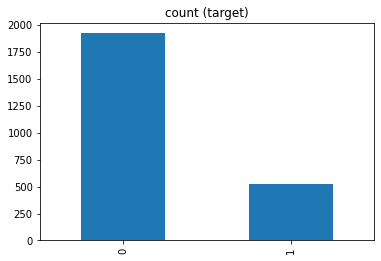

In [25]:
test_df['label'].value_counts().plot(kind='bar', title='count (target)')

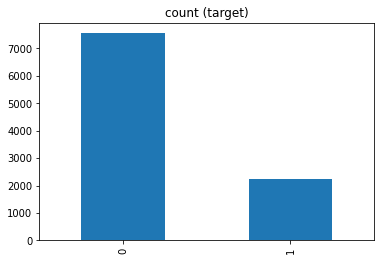

In [24]:
train_df['label'].value_counts().plot(kind='bar', title='count (target)')

In [26]:
# write a dataframe to tsv file
train_df.to_csv("train_df.tsv", sep="\t")

In [27]:

# check version number
import imblearn
print(imblearn.__version__)

0.8.1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(newDf['sentence'], newDf['label'], test_size=0.2)

In [ ]:
X_train

In [39]:
# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
X = train_df.iloc[:, 0:2].values
y = train_df.iloc[:, -1].values
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit(X, y)

TypeError: ignored